In [140]:
import requests
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import importlib
import osmnx as ox
import networkx as nx
import networkx.algorithms.traversal.breadth_first_search as bfs
from math import ceil

import LTA_API_key
import helper_functions.routing.publicTransit

importlib.reload(LTA_API_key)
importlib.reload(helper_functions.routing.publicTransit)

import LTA_API_key as apiKeys
import helper_functions.routing.publicTransit as publicTransit
from scipy.spatial.distance import cdist
from datetime import datetime

# OneMapAPI

### Get token

In [2]:
headers = publicTransit.generate_OneMap_token()

### Search

In [4]:
location = '59159 (BUS STOP)'

url = f"https://www.onemap.gov.sg/api/common/elastic/search?searchVal={location}&returnGeom=Y&getAddrDetails=Y"
    
response = publicTransit.get_OneMap_response(url,headers=headers)
response_first_result = response['results'] # get first item in the list
response_first_result

[{'SEARCHVAL': '59159 (BUS STOP)',
  'BLK_NO': '',
  'ROAD_NAME': 'YISHUN AVE 5',
  'BUILDING': '59159 (BUS STOP)',
  'ADDRESS': '59159 (BUS STOP)',
  'POSTAL': 'NIL',
  'X': '28150.4695976423',
  'Y': '45808.9831599183',
  'LATITUDE': '1.4305546622766',
  'LONGITUDE': '103.83467068843'}]

### Get data layers

In [5]:
url = "https://www.onemap.gov.sg/api/public/themesvc/getAllThemesInfo?moreInfo=Y"
response = publicTransit.get_OneMap_response(url,headers=headers)
response

{'Theme_Names': [{'THEMENAME': 'After Death Facilities',
   'QUERYNAME': 'afterdeathfacilities',
   'ICON': 'coffina20.jpg',
   'EXPIRY_DATE': '31/12/2028',
   'PUBLISHED_DATE': '01/01/2012',
   'CATEGORY': 'Environment',
   'THEME_OWNER': 'NATIONAL ENVIRONMENT AGENCY'},
  {'THEMENAME': 'Kindergartens',
   'QUERYNAME': 'kindergartens',
   'ICON': 'school.gif',
   'EXPIRY_DATE': '31/12/2026',
   'PUBLISHED_DATE': '01/01/2012',
   'CATEGORY': 'Education',
   'THEME_OWNER': 'EARLY CHILDHOOD DEVELOPMENT AGENCY'},
  {'THEMENAME': 'Community Clubs',
   'QUERYNAME': 'communityclubs',
   'ICON': 'PA.jpg',
   'EXPIRY_DATE': '30/12/2022',
   'PUBLISHED_DATE': '31/12/2011',
   'CATEGORY': 'Community',
   'THEME_OWNER': "PEOPLE'S ASSOCIATION"},
  {'THEMENAME': 'Private Education Institutions',
   'QUERYNAME': 'cpe_pei_premises',
   'ICON': 'pink.jpg',
   'EXPIRY_DATE': '20/07/2024',
   'PUBLISHED_DATE': '01/01/2012',
   'CATEGORY': 'Education',
   'THEME_OWNER': 'SKILLSFUTURE SINGAPORE'},
  {'THEM

### Get Public transit itineraries

In [6]:
itineraries = publicTransit.get_OneMap_itineraries(headers=headers,
                                    start_lat = 1.326762,
                                    start_lon = 103.8559,
                                    end_lat = 1.354701,
                                    end_lon= 103.833220,
                                    route_type = "pt" ,
                                    date = '01-13-2025',
                                    time = '07%3A35%3A00' ,
                                    mode = 'TRANSIT' ,
                                    maxWalkDistance = '1000' ,
                                    numItineraries = '3'
                                    )

In [65]:
OMI = publicTransit.OneMapItinerary(itinerary=itineraries[0])
busLeg_dfs = OMI.get_bus_routes()
busLeg_dfs

[                    name       stopId stopCode         lon       lat  \
 0          CURTIN S'PORE  FERRY:52419    52419  103.853917  1.328033   
 1            OPP BLK 102  FERRY:52409    52409  103.851052  1.328020   
 2               OPP EAIM  FERRY:52479    52479  103.845786  1.327496   
 3       AFT IRRAWADDY RD  FERRY:50169    50169  103.844208  1.326474   
 4  OPP TAN TONG MENG TWR  FERRY:51011    51011  103.840955  1.327705   
 
          arrival      departure  stopIndex  stopSequence vertexType  
 0  1736725208000  1736725208000         34            35    TRANSIT  
 1  1736725266000  1736725296000         35            36    TRANSIT  
 2  1736725397000  1736725427000         36            37    TRANSIT  
 3  1736725456000  1736725486000         37            38    TRANSIT  
 4  1736725543000  1736725756000         38            39    TRANSIT  ,
                      name       stopId stopCode         lon       lat  \
 0   OPP TAN TONG MENG TWR  FERRY:51011    51011  103.84095

In [77]:
OMI.legs[1]

{'startTime': 1736725208000,
 'endTime': 1736725543000,
 'departureDelay': 0,
 'arrivalDelay': 0,
 'realTime': False,
 'distance': 1798.29,
 'generalizedCost': 935,
 'pathway': False,
 'mode': 'BUS',
 'transitLeg': True,
 'route': '139',
 'agencyName': 'SBS Transit',
 'agencyUrl': 'http://www.sbstransit.com.sg/',
 'agencyTimeZoneOffset': 28800000,
 'routeType': 3,
 'routeId': '139',
 'interlineWithPreviousLeg': False,
 'agencyId': '1:SBST',
 'tripId': '139-2-1003',
 'serviceDate': '2025-01-13',
 'from': {'name': "CURTIN S'PORE",
  'stopId': 'FERRY:52419',
  'stopCode': '52419',
  'lon': 103.8539175,
  'lat': 1.3280331,
  'arrival': 1736725208000,
  'departure': 1736725208000,
  'stopIndex': 34,
  'stopSequence': 35,
  'vertexType': 'TRANSIT'},
 'to': {'name': 'OPP TAN TONG MENG TWR',
  'stopId': 'FERRY:51011',
  'stopCode': '51011',
  'lon': 103.8409547,
  'lat': 1.3277045,
  'arrival': 1736725543000,
  'departure': 1736725756000,
  'stopIndex': 38,
  'stopSequence': 39,
  'vertexType'

In [69]:
busLeg_dfs[0]

,name,stopId,stopCode,lon,lat,arrival,departure,stopIndex,stopSequence,vertexType
0,CURTIN S'PORE,FERRY:52419,52419,103.853917,1.328033,1736725208000,1736725208000,34,35,TRANSIT
1,OPP BLK 102,FERRY:52409,52409,103.851052,1.328020,1736725266000,1736725296000,35,36,TRANSIT
2,OPP EAIM,FERRY:52479,52479,103.845786,1.327496,1736725397000,1736725427000,36,37,TRANSIT
3,AFT IRRAWADDY RD,FERRY:50169,50169,103.844208,1.326474,1736725456000,1736725486000,37,38,TRANSIT
4,OPP TAN TONG MENG TWR,FERRY:51011,51011,103.840955,1.327705,1736725543000,1736725756000,38,39,TRANSIT


### Load G_car

In [11]:
save_dir = os.path.join(os.getcwd(),"data")
filename = "SG_car_network.graphml"

G_car = ox.load_graphml(os.path.join(save_dir,filename))

# GTFS
- Shapes are associated with Trips, and consist of a sequence of points through which the vehicle passes in order. Shapes do not need to intercept the location of Stops exactly, but all Stops on a trip should lie within a small distance of the shape for that trip, i.e. close to straight line segments connecting the shape points.
- `shape_pt_sequence` - Sequence in which the shape points connect to form the shape. Values must increase along the trip but do not need to be consecutive.
- `stop_sequence` - Order of stops, location groups, or GeoJSON locations for a particular trip. The values must increase along the trip but do not need to be consecutive.

In [136]:
GTFS_shapes = pd.read_csv(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_LTA\gtfs-feed-lta\shapes.txt")
GTFS_stops = pd.read_csv(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_LTA\gtfs-feed-lta\stops.txt")
GTFS_stop_times = pd.read_csv(r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_LTA\gtfs-feed-lta\stop_times.txt")
GTFS = GTFS_stop_times.merge(GTFS_stops,left_on="stop_id",right_on="stop_id")
print(f'Length of shapes: {GTFS_shapes.shape[0]}')
print(f'Length of stops: {GTFS_stops.shape[0]}')
print(f'Length of stop times: {GTFS_stop_times.shape[0]}')
print(f'Length of GTFS: {GTFS.shape[0]}')

Length of shapes: 68842
Length of stops: 5251
Length of stop times: 68842
Length of GTFS: 68842


In [88]:
GTFS_shapes[(GTFS_shapes['shape_id'].str.contains('.*139:WD:1.*')) & (GTFS_shapes['shape_pt_sequence'].isin(list(range(35,40))))]

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
54475,139:WD:1_shape,1.328033,103.853918,35
54476,139:WD:1_shape,1.328020,103.851053,36
54477,139:WD:1_shape,1.327496,103.845786,37
54478,139:WD:1_shape,1.326474,103.844208,38
54479,139:WD:1_shape,1.327842,103.840611,39


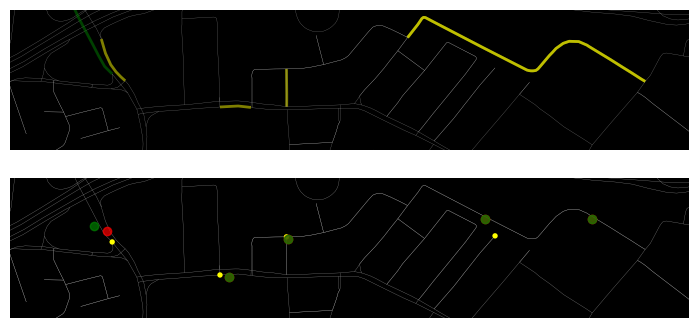

In [142]:
gtfs = GTFS_shapes[(GTFS_shapes['shape_id'].str.contains('.*139:WD:1.*')) & (GTFS_shapes['shape_pt_sequence'].isin(list(range(35,40))))]

fig, axes = plt.subplots(2,1, figsize=(12,4))
for ax in axes.flatten():
    ax.set_facecolor("black")
publicTransit.plot_bus_edges(G_car, gtfs, busLeg_dfs[0], ax=axes[0], xlim_factor = 0.2,ylim_factor = 0.7)
publicTransit.plot_bus_nodes(G_car, gtfs, busLeg_dfs[0],ax=axes[1],xlim_factor = 0.2,ylim_factor = 0.7)
plt.show()

# edges = get_bus_edges(G_car,busLeg_dfs[0],GTFS_shapes,plot=True)

negative ix:  [4]
408735640 to 408735638


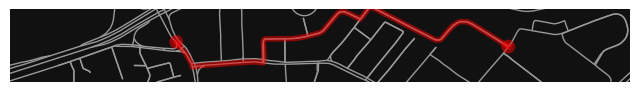

{1541260082: [0, 4, 5],
 408735646: [1, 2, 3, 6],
 2641677416: [7],
 408735640: [8, 9, 12],
 1948692194: [10, 11],
 408735638: [13],
 535163845: [14],
 535163842: [15],
 6897534219: [16, 17],
 2641816768: [18, 19],
 250072330: [20],
 889043315: [21],
 250072299: [22],
 1845458521: [23],
 2641636586: [24],
 241900939: [25],
 2641636610: [26]}

In [ ]:
def plot_routes(G,routes,gtfs):
    """ 
    Plot route for every adjacent node
    Args:
        G (G): driving route
        routes (list): list of candidate nodes that make up the route
        gtfs (pd.DataFrame): GTFS shape df that shows the bus stop coords
    """
    fig, ax = ox.plot_graph_route(G, [routes[0],routes[1]], node_size=0,
                                route_color="r",show=False,close=False)
    color_cycler = ['r','g','b']
    for i in range(1,len(routes)-1):
        ix_color = i%len(color_cycler)
        try:
            ox.plot_graph_route(G, [routes[i],routes[i+1]], node_size=0,
                                    route_color=color_cycler[ix_color],
                                    ax=ax,show=False,close=False)
        except:
            print(f'{routes[i]} to {routes[i+1]}')
            pass
    
    min_lat, max_lat = gtfs['shape_pt_lat'].min(),gtfs['shape_pt_lat'].max()
    delta_lat = max_lat - min_lat
    min_lon, max_lon = gtfs['shape_pt_lon'].min(),gtfs['shape_pt_lon'].max()
    delta_lon = max_lon - min_lon
    ax.set_ylim(min_lat-0.5*delta_lat,max_lat+0.5*delta_lat)
    ax.set_xlim(min_lon-0.5*delta_lon,max_lon+0.5*delta_lon)
    plt.show()

def identify_duplicated_node(nodes: list):
    """ 
    identifies duplicated nodes and returns the indices of the duplicated nodes
    Args:
        nodes (list): list of node IDs
    Returns:
        dict: keys are node IDs, values are list of indices where the node is duplicated
    """
    route_dict = dict()
    for i,n in enumerate(nodes):
        if n not in route_dict:
            route_dict[n] = [i]
        else:
            route_dict[n].append(i)
    return route_dict

def get_bus_edges_nodes(G,gtfs):
    """ 
    get edges where bus stops lie on top/closest to the road
    from the edges, derive the nodes of the edges
    Args:
        G (MultiDiGraph): graph of car network
        gtfs (pd.DataFrame): gtfs shapes df
    Returns:
        list: list of candidate node IDs that make up the route
    """
    edges_GTFS = ox.distance.nearest_edges(G,X = gtfs['shape_pt_lon'], Y = gtfs['shape_pt_lat'])
    # find the shortest path between nodes, minimizing travel time
    routes = []
    for e in range(len(edges_GTFS)-1):
        # get the shortest path within an identified edge
        route1 = [edges_GTFS[e][0], edges_GTFS[e][1]]
        # get the shortest path from the end of an edge to the start of the next edge
        route2 = ox.shortest_path(G, edges_GTFS[e][1], edges_GTFS[e+1][0], weight="travel_time")
        route = route1 + route2
        for r in route:
            # append the nodes visited by shortest path in sequential order
            routes.append(r)
    return routes

def check_connectivity(G,nodes_dict):
    """ 
    checks connectivity between the candidate nodes, and removes any disjointe paths
    Args:
        G (MultiDiGraph): graph of car network
        nodes_dict (dict): dict: keys are node IDs, values are list of indices where the node is duplicated
    Returns:
        list: node IDs which shows the connected route
    TODO: good to plot it in a directed tree chart, where each node can branch out into other nodes, use the tree to follow the directed path from the root to the end child
    """
    candidate_nodes = list(nodes_dict)
    nodes_last_idx = [i[-1] for i in list(nodes_dict.values())]
    # if the route progresses naturally without hiccups, it should only traverse each node once
    # if there is a disjoint/disruption in the path, then the routes will not be strictly increasing
    # a disjoint manifest in a negative value when we take the diff
    negative_diff = np.diff(nodes_last_idx) # diff[i] = x[i+1] - x[i]
    negative_ix = np.where(negative_diff<0)[0] + 1 # returns the index where diff is negative
    negative_ix = negative_ix.tolist()
    # find the shortest path between the 2 nodes prior and after the negative_ix node
    updated_nodes = []
    counter_nix = 0
    current_ix = negative_ix[counter_nix]
    for i in range(len(candidate_nodes)):
        if i != current_ix:
            updated_nodes.append(candidate_nodes[i])
        else:
            if (i > 0) and (i < len(candidate_nodes) - 1):
                nix1, nix2 = current_ix-1,current_ix+1 # the indices before and after the negative_ix nodes
                print(f'{candidate_nodes[nix1]} to {candidate_nodes[nix2]}')
                rerouted_route = ox.shortest_path(G, candidate_nodes[nix1], candidate_nodes[nix2], weight="travel_time")
                updated_nodes.extend(rerouted_route[1:-1])
            else:
                # if the node to remove is at the start or at the end, just skip the node
                pass
            counter_nix += 1
            if counter_nix < len(negative_ix):
                current_ix = negative_ix[counter_nix]
    return updated_nodes

def busRoute_shortestPath(G,gtfs, plot = True):
    """ 
    get edges where bus stops lie on top/closest to the road
    from the edges, derive the nodes of the edges
    Args:
        G (MultiDiGraph): graph of car network
        gtfs (pd.DataFrame): gtfs shapes df
    Returns:
        list: list of candidate node IDs that make up the route
    """
    # get nodes from edges
    routes = get_bus_edges_nodes(G,gtfs)
    # identify which nodes get duplicated
    duplicated_nodes = identify_duplicated_node(routes) # returns a dict where keys = nodes, values = list of indices of the duplicated nodes
    updated_nodes = check_connectivity(G,duplicated_nodes)
    
    if plot:
        try:
            fig,ax = ox.plot_graph_route(G, updated_nodes, node_size=0,show=False,close=False)
            min_lat, max_lat = gtfs['shape_pt_lat'].min(),gtfs['shape_pt_lat'].max()
            delta_lat = max_lat - min_lat
            min_lon, max_lon = gtfs['shape_pt_lon'].min(),gtfs['shape_pt_lon'].max()
            delta_lon = max_lon - min_lon
            ax.set_ylim(min_lat-0.5*delta_lat,max_lat+0.5*delta_lat)
            ax.set_xlim(min_lon-0.5*delta_lon,max_lon+0.5*delta_lon)
            plt.show()

        except:
            plot_routes(G,updated_nodes,gtfs)

    return duplicated_nodes

gtfs = GTFS_shapes[(GTFS_shapes['shape_id'].str.contains('.*139:WD:1.*')) & (GTFS_shapes['shape_pt_sequence'].isin(list(range(35,40))))]
busRoute_shortestPath(G_car,gtfs)

In [154]:
GTFS.tail()

,arrival_time,departure_time,stop_id,stop_sequence,trip_id,stop_code,stop_lat,stop_lon,stop_name,stop_url,wheelchair_boarding
68837,25:06:36,25:06:36,43839,57,NR8:SAT:0,43839,1.365273,103.748250,Opp Blk 336,https://busrouter.sg/#/stops/43839,1
68838,25:07:48,25:07:48,43649,58,NR8:SAT:0,43649,1.365458,103.750602,HomeTeamNS,https://busrouter.sg/#/stops/43649,1
68839,25:09:48,25:09:48,43589,59,NR8:SAT:0,43589,1.362273,103.751532,Opp Blk 347,https://busrouter.sg/#/stops/43589,1
68840,25:11:24,25:11:24,43579,60,NR8:SAT:0,43579,1.359117,103.751668,Bt Gombak Stn,https://busrouter.sg/#/stops/43579,1
68841,25:12:36,25:12:36,43609,61,NR8:SAT:0,43609,1.356536,103.749924,Blk 531,https://busrouter.sg/#/stops/43609,1


In [199]:
itinerary = OneMapItinerary(response['plan']['itineraries'][0])
# legs = itinerary.legs
# print('number of legs: ', len(legs))
# bl = BusLeg(legs[1])
# bl.get_stops_data()
itinerary.get_bus_routes()

,name,stopId,stopCode,lon,lat,arrival,departure,stopIndex,stopSequence,vertexType
0,CURTIN S'PORE,FERRY:52419,52419,103.853917,1.328033,1736725208000,1736725208000,34,35,TRANSIT
1,OPP BLK 102,FERRY:52409,52409,103.851052,1.328020,1736725266000,1736725296000,35,36,TRANSIT
2,OPP EAIM,FERRY:52479,52479,103.845786,1.327496,1736725397000,1736725427000,36,37,TRANSIT
3,AFT IRRAWADDY RD,FERRY:50169,50169,103.844208,1.326474,1736725456000,1736725486000,37,38,TRANSIT
4,OPP TAN TONG MENG TWR,FERRY:51011,51011,103.840955,1.327705,1736725543000,1736725756000,38,39,TRANSIT
0,OPP TAN TONG MENG TWR,FERRY:51011,51011,103.840955,1.327705,1736725543000,1736725756000,18,19,TRANSIT
1,OLD POLICE ACAD,FERRY:51021,51021,103.839259,1.330325,1736725813000,1736725843000,19,20,TRANSIT
2,S'PORE POLO CLUB,FERRY:51031,51031,103.838389,1.332232,1736725886000,1736725916000,20,21,TRANSIT
3,AFT ANDREW RD,FERRY:51051,51051,103.837078,1.336353,1736725988000,1736726018000,21,22,TRANSIT
4,MACRITCHIE RESERVOIR,FERRY:51071,51071,103.835966,1.342193,1736726119000,1736726149000,22,23,TRANSIT


In [155]:
GTFS_stop_times[GTFS_stop_times['trip_id'].str.contains('.*130:WD:0.*')].head()

,arrival_time,departure_time,stop_id,stop_sequence,trip_id
6913,05:30:00,05:30:00,54009,1,130:WD:0
6914,05:32:24,05:32:24,54248,2,130:WD:0
6915,05:34:24,05:34:24,54019,3,130:WD:0
6916,05:37:36,05:37:36,53321,4,130:WD:0
6917,05:38:48,05:38:48,53209,5,130:WD:0


In [187]:
response['plan']['itineraries'][0]['legs'][1].keys()

dict_keys(['startTime', 'endTime', 'departureDelay', 'arrivalDelay', 'realTime', 'distance', 'generalizedCost', 'pathway', 'mode', 'transitLeg', 'route', 'agencyName', 'agencyUrl', 'agencyTimeZoneOffset', 'routeType', 'routeId', 'interlineWithPreviousLeg', 'agencyId', 'tripId', 'serviceDate', 'from', 'to', 'intermediateStops', 'legGeometry', 'steps', 'routeShortName', 'routeLongName', 'duration'])

In [117]:
print(response['plan']['itineraries'][0]['legs'][1]['from']['arrival'])
print(response['plan']['itineraries'][0]['legs'][1]['from']['departure'])
print(response['plan']['itineraries'][0]['legs'][1]['startTime'])
print(response['plan']['itineraries'][0]['legs'][1]['endTime'])
print(response['plan']['itineraries'][0]['legs'][1]['duration'])
response['plan']['itineraries'][0]['legs'][1]

1736725208000
1736725208000
1736725208000
1736725543000
335


{'startTime': 1736725208000,
 'endTime': 1736725543000,
 'departureDelay': 0,
 'arrivalDelay': 0,
 'realTime': False,
 'distance': 1798.29,
 'generalizedCost': 935,
 'pathway': False,
 'mode': 'BUS',
 'transitLeg': True,
 'route': '139',
 'agencyName': 'SBS Transit',
 'agencyUrl': 'http://www.sbstransit.com.sg/',
 'agencyTimeZoneOffset': 28800000,
 'routeType': 3,
 'routeId': '139',
 'interlineWithPreviousLeg': False,
 'agencyId': '1:SBST',
 'tripId': '139-2-1003',
 'serviceDate': '2025-01-13',
 'from': {'name': "CURTIN S'PORE",
  'stopId': 'FERRY:52419',
  'stopCode': '52419',
  'lon': 103.8539175,
  'lat': 1.3280331,
  'arrival': 1736725208000,
  'departure': 1736725208000,
  'stopIndex': 34,
  'stopSequence': 35,
  'vertexType': 'TRANSIT'},
 'to': {'name': 'OPP TAN TONG MENG TWR',
  'stopId': 'FERRY:51011',
  'stopCode': '51011',
  'lon': 103.8409547,
  'lat': 1.3277045,
  'arrival': 1736725543000,
  'departure': 1736725756000,
  'stopIndex': 38,
  'stopSequence': 39,
  'vertexType'

In [171]:
GTFS[GTFS['trip_id'].str.contains('.*139:WD:0.*')].head()

,arrival_time,departure_time,stop_id,stop_sequence,trip_id,stop_code,stop_lat,stop_lon,stop_name,stop_url,wheelchair_boarding
9263,05:30:00,05:30:00,52009,1,139:WD:0,52009,1.332021,103.846928,Toa Payoh Int,https://busrouter.sg/#/stops/52009,1
9264,05:34:24,05:34:24,52079,2,139:WD:0,52079,1.329315,103.843829,Opp Trellis Twrs,https://busrouter.sg/#/stops/52079,1
9265,05:36:24,05:36:24,50161,3,139:WD:0,50161,1.326657,103.843660,Bef Jln Dusun,https://busrouter.sg/#/stops/50161,1
9266,05:37:36,05:37:36,50171,4,139:WD:0,50171,1.326634,103.846410,Zhongshan Mall,https://busrouter.sg/#/stops/50171,1
9267,05:40:00,05:40:00,52401,5,139:WD:0,52401,1.328302,103.850829,Blk 102,https://busrouter.sg/#/stops/52401,1


In [180]:
set(response['plan']['itineraries'][0]['legs'][1]['to'].keys())
set(response['plan']['itineraries'][0]['legs'][1]['from'].keys())
set(response['plan']['itineraries'][0]['legs'][1]['intermediateStops'][0].keys())

{'arrival',
 'departure',
 'lat',
 'lon',
 'name',
 'stopCode',
 'stopId',
 'stopIndex',
 'stopSequence',
 'vertexType'}

In [168]:
print(response['plan']['itineraries'][0]['legs'][1]['routeId'])
response['plan']['itineraries'][0]['legs'][1]['intermediateStops']

139


[{'name': 'OPP BLK 102',
  'stopId': 'FERRY:52409',
  'stopCode': '52409',
  'lon': 103.8510525,
  'lat': 1.3280197,
  'arrival': 1736725266000,
  'departure': 1736725296000,
  'stopIndex': 35,
  'stopSequence': 36,
  'vertexType': 'TRANSIT'},
 {'name': 'OPP EAIM',
  'stopId': 'FERRY:52479',
  'stopCode': '52479',
  'lon': 103.8457862,
  'lat': 1.3274962,
  'arrival': 1736725397000,
  'departure': 1736725427000,
  'stopIndex': 36,
  'stopSequence': 37,
  'vertexType': 'TRANSIT'},
 {'name': 'AFT IRRAWADDY RD',
  'stopId': 'FERRY:50169',
  'stopCode': '50169',
  'lon': 103.8442081,
  'lat': 1.326474,
  'arrival': 1736725456000,
  'departure': 1736725486000,
  'stopIndex': 37,
  'stopSequence': 38,
  'vertexType': 'TRANSIT'}]

In [159]:
response['plan']['itineraries'][0]['legs'][1].keys()

dict_keys(['startTime', 'endTime', 'departureDelay', 'arrivalDelay', 'realTime', 'distance', 'generalizedCost', 'pathway', 'mode', 'transitLeg', 'route', 'agencyName', 'agencyUrl', 'agencyTimeZoneOffset', 'routeType', 'routeId', 'interlineWithPreviousLeg', 'agencyId', 'tripId', 'serviceDate', 'from', 'to', 'intermediateStops', 'legGeometry', 'steps', 'routeShortName', 'routeLongName', 'duration'])

In [53]:
from datetime import datetime
datetime.fromtimestamp(response['plan']['itineraries'][0]['startTime']/1000).strftime('%Y-%m-%d %H:%M:%S')
# stops_df['arrival'] = pd.to_datetime(stops_df['arrival'],unit='ms')
# stops_df['departure'] = pd.to_datetime(stops_df['departure'],unit='ms')

'2023-08-13 07:35:00'

In [54]:
response['plan']['itineraries'][0]['legs'][0]

{'startTime': 1691883300000,
 'endTime': 1691885159000,
 'departureDelay': 0,
 'arrivalDelay': 0,
 'realTime': False,
 'distance': 1971.42,
 'generalizedCost': 16142,
 'pathway': False,
 'mode': 'WALK',
 'transitLeg': False,
 'route': '',
 'agencyTimeZoneOffset': 28800000,
 'interlineWithPreviousLeg': False,
 'from': {'name': 'Origin',
  'lon': 103.84415,
  'lat': 1.320981,
  'departure': 1691883300000,
  'vertexType': 'NORMAL'},
 'to': {'name': 'Destination',
  'lon': 103.8559,
  'lat': 1.326762,
  'arrival': 1691885159000,
  'vertexType': 'NORMAL'},
 'legGeometry': {'points': 's~`GmayxRa@a@VSDE_@[CBIHQHG@E?E?ICIEgAcAIMqA}@QICCMGWMMEUKOEOEcAYAC?IRu@J]BMNe@Nm@DCAEWIC?MA??UGiAg@?ADG@A@EYKGE?WPa@DKd@kADKLY@CACBQHCr@gB@KGSGKEE]OICIEOMKGYM[MGCGCK?GKNO?EC?_@a@GGa@a@A@IMIIAAq@s@EGKISS@ARWLQXYECHGLKBIh@g@LM\\WRQPMNMNKZUAC][AA@CEKQOCCGEYWIGECCCMKGGMIECECIIGGCCEEKGa@_@MIq@i@OMKGGGKIGEOKEM?CGGQMAAAAC???OM??YWC?OOGGCAMKCACC@AFI@AECCEACCAA?CCa@[UOIGUQCCKK[UQOGG?G?ET[QOCCEAIIMIFIl@y@MI',
  'length'

In [67]:
print(response['plan']['itineraries'][0]['legs'][0]['startTime'])
print(response['plan']['itineraries'][0]['legs'][0]['endTime'])
print(response['plan']['itineraries'][0]['legs'][0]['mode'])
print(response['plan']['itineraries'][0]['legs'][0]['from'])
print(response['plan']['itineraries'][0]['legs'][0]['to'])
print(response['plan']['itineraries'][0]['legs'][0]['distance']) # distance in metres
print(response['plan']['itineraries'][0]['legs'][0]['pathway'])
print(response['plan']['itineraries'][0]['legs'][0]['duration']) # duration in seconds

1691883300000
1691885159000
WALK
{'name': 'Origin', 'lon': 103.84415, 'lat': 1.320981, 'departure': 1691883300000, 'vertexType': 'NORMAL'}
{'name': 'Destination', 'lon': 103.8559, 'lat': 1.326762, 'arrival': 1691885159000, 'vertexType': 'NORMAL'}
1971.42
False
1859


In [61]:
response['plan']['itineraries'][0]['legs'][0].keys()

dict_keys(['startTime', 'endTime', 'departureDelay', 'arrivalDelay', 'realTime', 'distance', 'generalizedCost', 'pathway', 'mode', 'transitLeg', 'route', 'agencyTimeZoneOffset', 'interlineWithPreviousLeg', 'from', 'to', 'legGeometry', 'steps', 'rentedBike', 'walkingBike', 'duration'])

In [60]:
datetime.fromtimestamp(response['plan']['itineraries'][0]['legs'][0]['endTime']/1000) - datetime.fromtimestamp(response['plan']['itineraries'][0]['startTime']/1000)


datetime.timedelta(seconds=1859)